<a href="https://colab.research.google.com/github/Iman005/Machine-Learning/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("housing.csv")

In [4]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=40)

In [5]:
df["median_income_categories"]=pd.cut(df["median_income"],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

<Axes: xlabel='median_income_categories'>

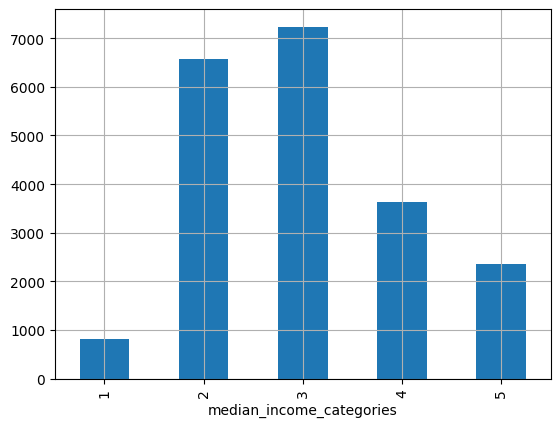

In [12]:
df["median_income_categories"].value_counts().sort_index().plot.bar(grid=True)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
sss=StratifiedShuffleSplit(n_splits=10 , test_size=0.2,random_state=40)
stratified_split=[]
for train_i , test_i in sss.split(df,df["median_income_categories"]):
  stratified_train_set_n=df.iloc[train_i]
  stratified_test_set_n=df.iloc[test_i]
  stratified_split.append((stratified_train_set_n,stratified_test_set_n))

In [15]:
stratified_train_set,stratified_test_set=stratified_split[0]

In [16]:
str_train_set,str_test_set=train_test_split(df,test_size=0.2,stratify=df["median_income_categories"],random_state=40)

In [18]:
str_train_set=str_train_set.drop("median_income_categories",axis=1)
str_test_set=str_test_set.drop("median_income_categories",axis=1)

In [20]:
train=str_train_set.copy()
test=str_test_set.copy()

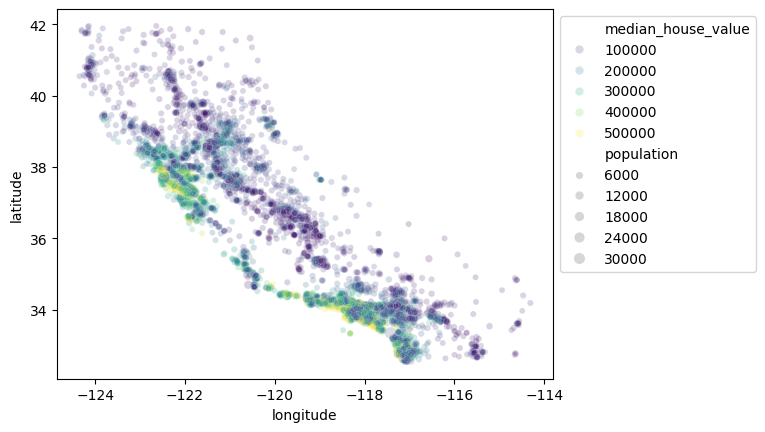

In [29]:
ax=sns.scatterplot(data=train,x="longitude",y="latitude",size="population",alpha=0.2,hue="median_house_value",palette="viridis")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))